In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

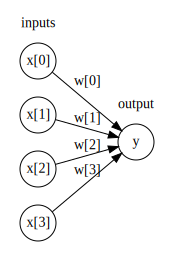

In [8]:
mglearn.plots.plot_logistic_regression_graph()

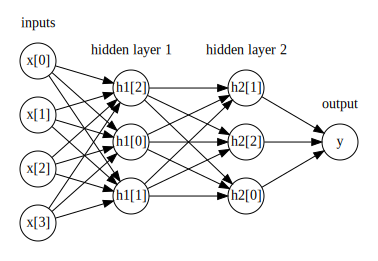

In [9]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

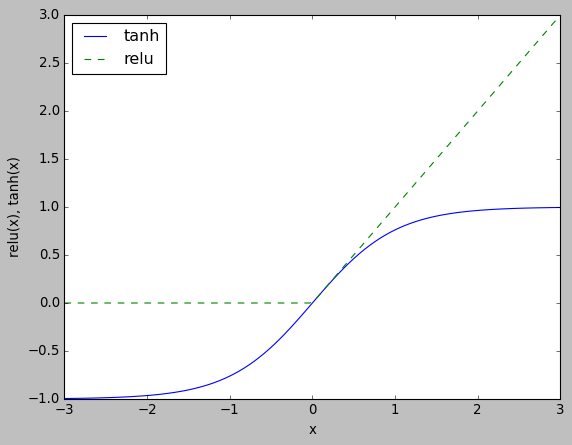

In [13]:
# 가중치의 합을 계산하고 그 이후 적용하는 함수
# sigmoid 함수를 적용하기도 함
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), ls = '--', label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

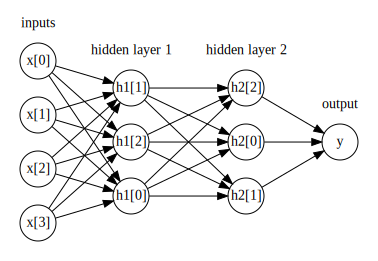

In [14]:
# 은닉층의 유닛 개수 또는 은닉층의 개수를 추가할 수 있다.
mglearn.plots.plot_two_hidden_layer_graph()

### hidden_layer_sizes(은닉층의 유닛 갯수) : [a1, a2, .. ] (default = 100)
#### 은닉층의 수 만큼 배열을 형성하고 각각의 값이 해당 은닉층의 유닛수이다. 

### alpha : L2페널티의 가중치 (alpha 가 높아지면 복잡도가 줄어든다)

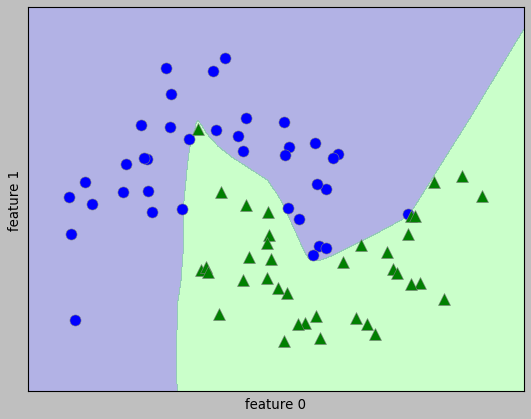

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, cm = mglearn.cm3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

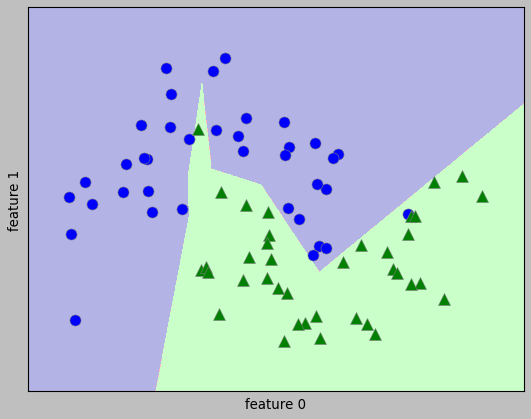

In [18]:
# 은닉층이 [10] 인 경우
# 은닉층의 수를 줄였으므로 반복 횟수를 늘린다.
mlp = MLPClassifier(solver='lbfgs', random_state = 0, hidden_layer_sizes=[10],
                    max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_classification(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()


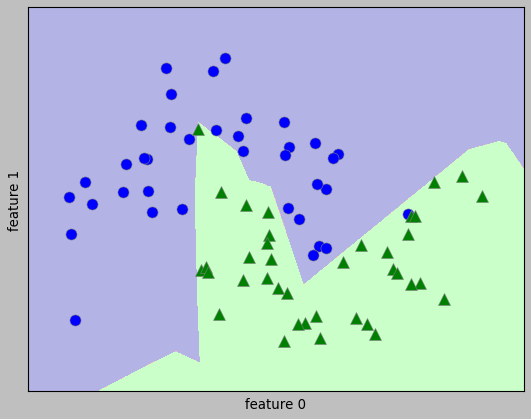

In [22]:
# 은닉층이 [10,10] 인 경우
mlp = MLPClassifier(solver='lbfgs', random_state = 0, hidden_layer_sizes=[10,10],
                    max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_classification(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

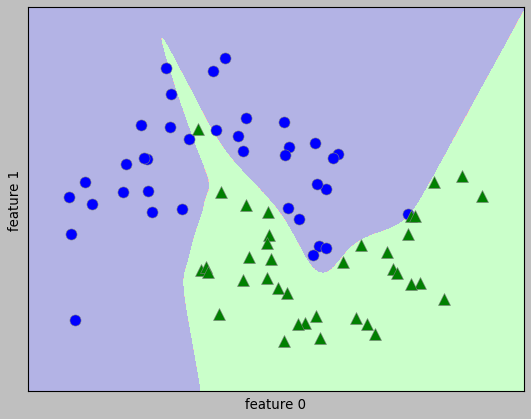

In [23]:
# 활성화 함수가 tanh 인 경우
mlp = MLPClassifier(solver='lbfgs', random_state = 0, hidden_layer_sizes=[10,10],
                    max_iter = 1000, activation='tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_classification(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

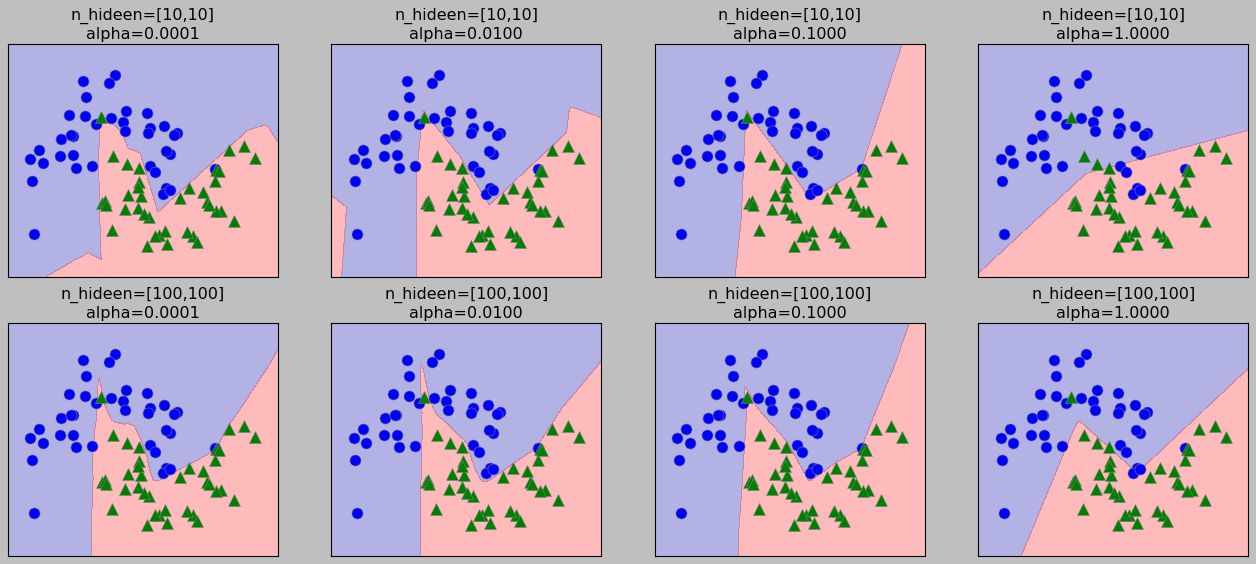

In [25]:
fig, axes = plt.subplots(2,4, figsize = (20,8))
n_hidden_nodes = [10,100]
alphas = [0.0001,0.01,0.1,1]

for axx, n in zip(axes, n_hidden_nodes) :
    for ax, alpha in zip(axx, alphas) :
        mlp = MLPClassifier(solver='lbfgs', random_state = 0, max_iter = 1000,
                            hidden_layer_sizes=[n,n], alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha = 0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax = ax)
        ax.set_title(f"n_hideen=[{n},{n}]\nalpha={alpha:0.4f}")
        

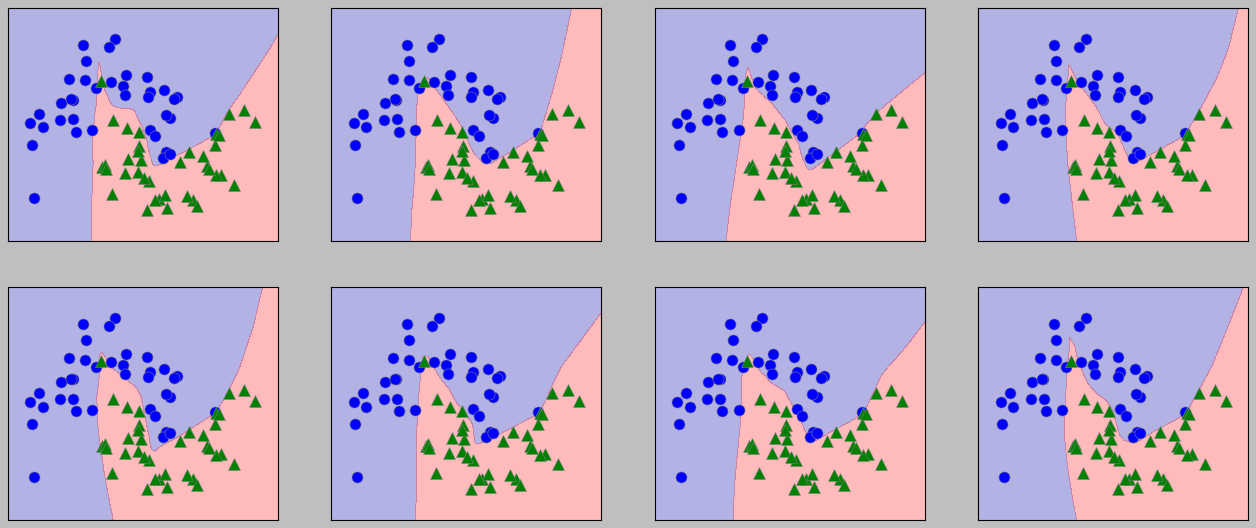

In [26]:
# 신경망에서는 시작하기 전 가중치를 무작위로 선택한다.
# 따라서 같은 매개변수라도 다른 초기화된 가중치 때문에 학습이 달라질 수 있다.

fig, axes = plt.subplots(2,4,figsize = (20,8))

for i, ax in enumerate(axes.ravel()) :
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax = ax)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
std = StandardScaler().fit(X_train)
X_train_trans = std.transform(X_train)
X_test_trans = std.transform(X_test)

mlp = MLPClassifier(random_state=0).fit(X_train_trans, y_train)

print(f"train score = {mlp.score(X_train_trans, y_train):0.3f}")
print(f"test score = {mlp.score(X_test_trans, y_test):0.3f}")

train score = 0.991
test score = 0.965


In [32]:
mlp = MLPClassifier(random_state=0, max_iter = 1000).fit(X_train_trans, y_train)
print(f"train score = {mlp.score(X_train_trans, y_train):0.3f}")
print(f"test score = {mlp.score(X_test_trans, y_test):0.3f}")

train score = 1.000
test score = 0.972


In [33]:
mlp = MLPClassifier(random_state=0, max_iter = 1000, alpha = 1).fit(X_train_trans, y_train)
print(f"train score = {mlp.score(X_train_trans, y_train):0.3f}")
print(f"test score = {mlp.score(X_test_trans, y_test):0.3f}")

train score = 0.988
test score = 0.972
